### Assignment 3B
<p>Build the Image Classification Model by dividing model into 4 stages: 
    <ul>
        <li>Loading and preprocessing the image</li>
        <li>Defining the model architecture</li>
        <li>Training the model</li>
        <li>Estimating the model's performance</li>
    </ul>
</p>

### Installing Libraries

In [1]:
!pip install tensorflow 
!pip install keras.models
!pip install keras.datasets

### Importing Libraries

In [2]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x_train = np.loadtxt('datasets/input.csv', delimiter =',')
y_train = np.loadtxt('datasets/labels.csv', delimiter=',')

x_test = np.loadtxt('datasets/input_test.csv', delimiter=',')
y_test = np.loadtxt('datasets/labels_test.csv', delimiter=',')

In [5]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 30000)
Shape of y_train:  (2000,)
Shape of x_test:  (400, 30000)
Shape of y_test:  (400,)


In [6]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(x_test), 1)

In [7]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [8]:
# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
        input_shape=(100, 100, 3)
    ),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x_train, y_train, epochs=15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 10s 296ms/step - loss: 0.6950 - accuracy: 0.5405
Epoch 2/15
32/32 [==============================] - 9s 284ms/step - loss: 0.6636 - accuracy: 0.6220
Epoch 3/15
32/32 [==============================] - 9s 287ms/step - loss: 0.5927 - accuracy: 0.6810
Epoch 4/15
32/32 [==============================] - 9s 287ms/step - loss: 0.5479 - accuracy: 0.7115
Epoch 5/15
32/32 [==============================] - 9s 282ms/step - loss: 0.4796 - accuracy: 0.7675
Epoch 6/15
32/32 [==============================] - 9s 287ms/step - loss: 0.4174 - accuracy: 0.8200
Epoch 7/15
32/32 [==============================] - 9s 288ms/step - loss: 0.3689 - accuracy: 0.8355
Epoch 8/15
32/32 [==============================] - 9s 284ms/step - loss: 0.3122 - accuracy: 0.8610
Epoch 9/15
32/32 [==============================] - 9s 293ms/step - loss: 0.2503 - accuracy: 0.8980
Epoch 10/15
32/32 [==============================] - 10s 298ms/step - loss: 0.2082 - accuracy: 0.92

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss * 100)
print("Accuracy: ", accuracy * 100)

13/13 [==============================] - 1s 36ms/step - loss: 1.1353 - accuracy: 0.6775
Loss:  113.53360414505005
Accuracy:  67.75000095367432


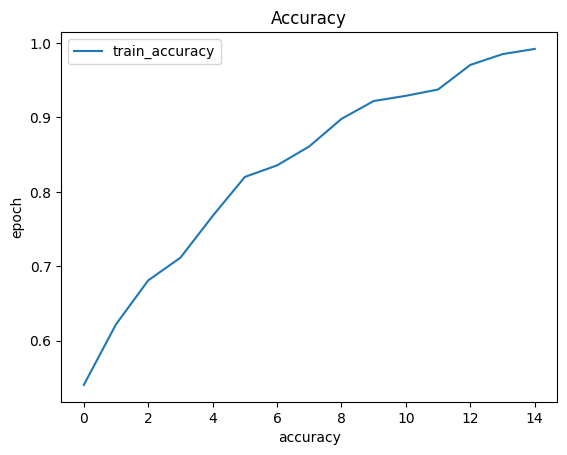

In [13]:
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

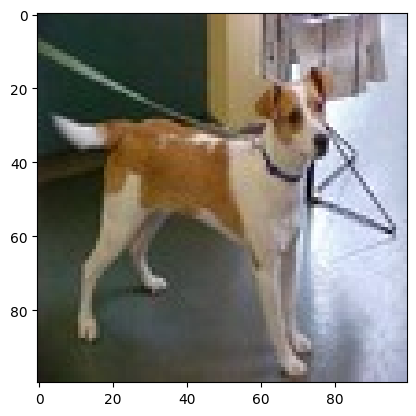

1/1 [==============================] - 0s 32ms/step
It is a dog


In [43]:
import random
random_index = random.randint(0, len(y_test))
plt.imshow(x_test[random_index, :])
plt.show()

y_pred = model.predict(x_test[random_index, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'

print("It is a", pred)